In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analysis_support import *
from plots import *

# IMPORTANT: need to install package `cm-super-minimal` and `dvipng` for matplotlib Latex Output to work

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 20,
    "axes.prop_cycle": plt.cycler('color', ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
instance_set = 'all'
instances = None
#instance_set = 'handcrafted'
#instances = [119, 160, 188, 192, 196, 250, 261, 263, 278, 287]

In [3]:
seeds = [1, 41, 83, 139, 181, 257, 307, 353, 401, 449]

In [4]:
file_pattern = f'classic.speed.BARN-{instance_set}/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
classic_table = tabulate_deterministic_results(results)

classic.speed.BARN-all/*.classic.*.*/lazy_prm_classic.BARN.instance_*.json
Found 22048 result files
Error decoding JSON file: classic.speed.BARN-all/halton.classic.polytrace.bk/lazy_prm_classic.BARN.instance_063.halton.a_star.single_edge.bk.seed.307.max_speed.1.5step_size.polytrace.20-0.5.json
Message: Expecting ',' delimiter: line 16118 column 14 (char 367954)
Error decoding JSON file: classic.speed.BARN-all/uniform.classic.polytrace.bk/lazy_prm_classic.BARN.instance_062.uniform.a_star.single_edge.bk.seed.1.max_speed.1.5step_size.polytrace.20-0.5.json
Message: Expecting ',' delimiter: line 4882 column 26 (char 98168)
Missing results: 0


In [5]:
file_pattern = f'bc.speed.BARN-{instance_set}/*.*.*.*/lazy_prm_bc.BARN.instance_*.json'
print(file_pattern)
# Halton results loading
results = collect_deterministic_results([file_pattern], instances, seeds)
bnc_table = tabulate_deterministic_results(results)

bc.speed.BARN-all/*.*.*.*/lazy_prm_bc.BARN.instance_*.json
Found 34849 result files
Missing results: 0


In [6]:
classic_configs, classic_tables = tabulate_results_by(classic_table, ('check_type','step_size','direction', 'max_speed'))

[array(['polytrace', 'unknown'], dtype=object), array([0.02, 0.1 ]), array(['bk'], dtype=object), array([1.5, 2. ])]
Tables generated: 8


In [7]:
bnc_configs, bnc_tables = tabulate_results_by(bnc_table, ('solver','no_good_type','direction', 'max_speed'))

[array(['cp_sat', 'pulse'], dtype=object), array(['multi_edge'], dtype=object), array(['bk', 'gammell'], dtype=object), array([1.5, 2. ])]
Tables generated: 8


In [8]:
classic_coverage = {}
for v in classic_configs:
    if len(classic_tables[v]) > 0:
        classic_coverage[v] = coverage_over_time(select_valid_instances(classic_tables[v]))

In [9]:
relevant_bnc_tables = {v: bnc_tables[v] for v in bnc_configs if v[1] == 'multi_edge'}

In [10]:
bnc_coverage = {}
for key, table in relevant_bnc_tables.items():
    bnc_coverage[key] = coverage_over_time(select_valid_instances(table))

# Coverage comparison, $v_{max} \leq 1.5$

('cp_sat', 'multi_edge', 'bk', 1.5)
('pulse', 'multi_edge', 'bk', 1.5)


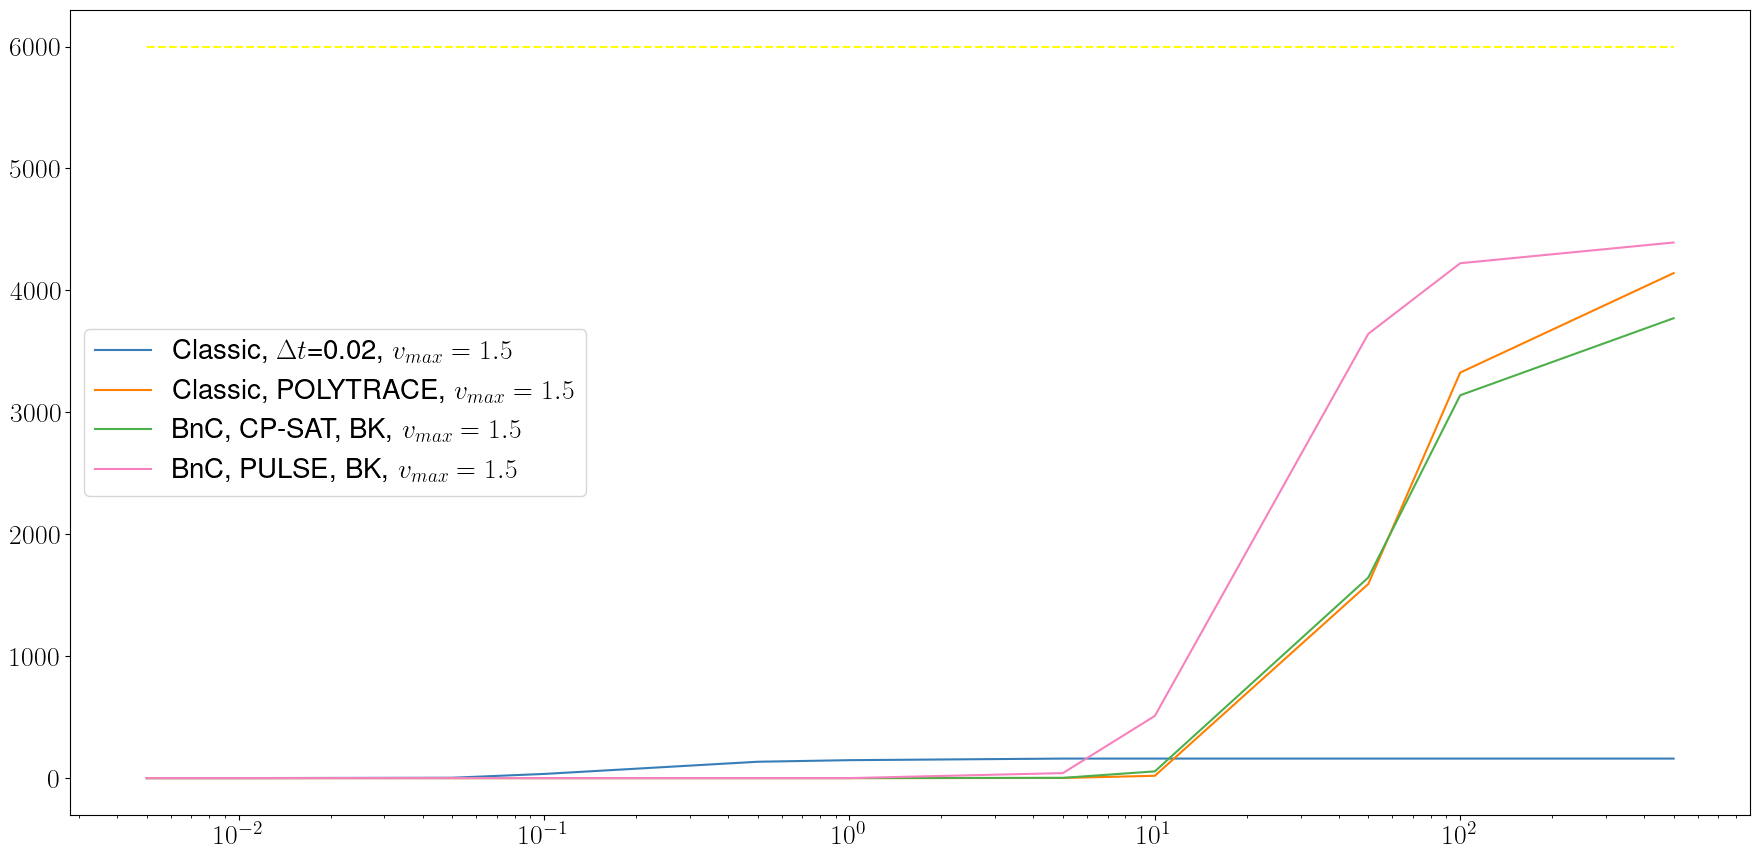

In [11]:
cmp_classic_configs = [('unknown', 0.02, 'bk', 1.5), ('polytrace', 0.1, 'bk', 1.5)]
bnc_configs = [('cp_sat', 'multi_edge', 'bk', 1.5), ('pulse', 'multi_edge', 'bk', 1.5)]

plt.figure(figsize=(18, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')

for v in cmp_classic_configs:
    label = 'Classic'
    if v[0] == 'polytrace':
        label += ', POLYTRACE'
    else:
        label += ', $\Delta t$={}'.format(v[1])
    label += ', ${} = {}$'.format('v_{max}', v[-1])
    plt.plot(default_time_breakpoints, classic_coverage[v], label=label)

for bnc_config in bnc_configs:
    print(bnc_config)
    label = 'BnC'
    if bnc_config[0] == 'cp_sat':
        label += ', CP-SAT'
    elif bnc_config[0] == 'pulse':
        label += ', PULSE'
    if bnc_config[2] == 'bk':
        label += ', BK'
    elif bnc_config[2] == 'gammell':
        label += ', Gammell'
    label += ', ${} = {}$'.format('v_{max}', bnc_config[-1])
    plt.plot(default_time_breakpoints, bnc_coverage[bnc_config], label=label)

#plt.title('Coverage of Lazy PRM configurations')
#plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
#plt.ylabel('Valid')
plt.legend()
plt.tight_layout()
plt.show()

## Detailed comparison, $v_{max} \leq 1.5$

In [12]:
classic_best = classic_tables[('polytrace', 0.1, 'bk', 1.5)]
bnc_best = bnc_tables[('pulse', 'multi_edge', 'bk', 1.5)]
cmp_table = pd.merge(classic_best, bnc_best, on=('instance', 'seed', 'sequence'), suffixes=('.classic', '.bnc'))
cmp_table.head()

,domain.classic,instance,seed,sequence,max_speed.classic,no_good_type.classic,solver.classic,direction.classic,check_type.classic,num_no_goods.classic,rgg_V.classic,rgg_E.classic,rgg_expansions.classic,rgg_dispersion.classic,elapsed_time.classic,plan_time.classic,verif_time.classic,iterations.classic,valid.classic,exact_verification_time.classic,step_size.classic,holonomic_cost_0.classic,holonomic_cost_k.classic,smooth_cost_0.classic,smooth_cost_k.classic,plan_length.classic,domain.bnc,max_speed.bnc,no_good_type.bnc,solver.bnc,direction.bnc,check_type.bnc,num_no_goods.bnc,rgg_V.bnc,rgg_E.bnc,rgg_expansions.bnc,rgg_dispersion.bnc,elapsed_time.bnc,plan_time.bnc,verif_time.bnc,iterations.bnc,valid.bnc,exact_verification_time.bnc,step_size.bnc,holonomic_cost_0.bnc,holonomic_cost_k.bnc,smooth_cost_0.bnc,smooth_cost_k.bnc,plan_length.bnc
0,BARN,instance_042,181,halton,1.5,single_edge,a_star,bk,polytrace,104,112,2757,10,5.150895,12.979088,0.051245,12.329926,114,True,0.0,0.1,10.435708,10.952309,11.149577,11.024053,12,BARN,1.5,multi_edge,pulse,bk,polytrace,35,372,39668,36,2.349320,12.357714,1.615046,8.189510,36,True,None,None,10.435708,9.674869,11.149577,9.580257,11
1,BARN,instance_012,1,halton,1.5,single_edge,a_star,bk,polytrace,94,112,2319,10,5.150895,55.512846,0.114002,54.548316,104,True,0.0,0.1,12.566364,11.919479,12.860110,12.022566,13,BARN,1.5,multi_edge,pulse,bk,polytrace,39,412,39964,40,2.773530,21.904258,5.955324,12.265145,40,True,None,None,12.566364,10.326637,12.860110,10.300535,13
2,BARN,instance_050,139,halton,1.5,single_edge,a_star,bk,polytrace,176,112,2542,10,3.783398,86.359639,0.154271,84.909059,186,True,0.0,0.1,10.743326,12.142247,10.930761,12.343898,14,BARN,1.5,multi_edge,pulse,bk,polytrace,26,282,20338,27,3.471200,18.541732,0.787908,15.854372,27,True,None,None,10.743326,9.740955,10.930761,9.748380,13
3,BARN,instance_123,139,halton,1.5,single_edge,a_star,bk,polytrace,91,92,1649,8,5.150895,49.039855,0.075828,48.516433,99,True,0.0,0.1,13.407025,12.063535,13.625550,12.136291,13,BARN,1.5,multi_edge,pulse,bk,polytrace,33,352,33540,34,2.939395,25.717813,4.788646,16.697271,34,True,None,None,13.407025,9.800227,13.625550,9.721785,13
4,BARN,instance_218,449,halton,1.5,single_edge,a_star,bk,polytrace,210,112,2277,10,8.389869,72.413936,0.228855,71.032849,220,True,0.0,0.1,12.134987,14.070087,12.295110,14.217795,17,BARN,1.5,multi_edge,pulse,bk,polytrace,37,392,32185,38,3.047402,24.860743,11.459818,10.480545,38,True,None,None,12.134987,10.290408,12.295110,10.254480,12


### Plan costs

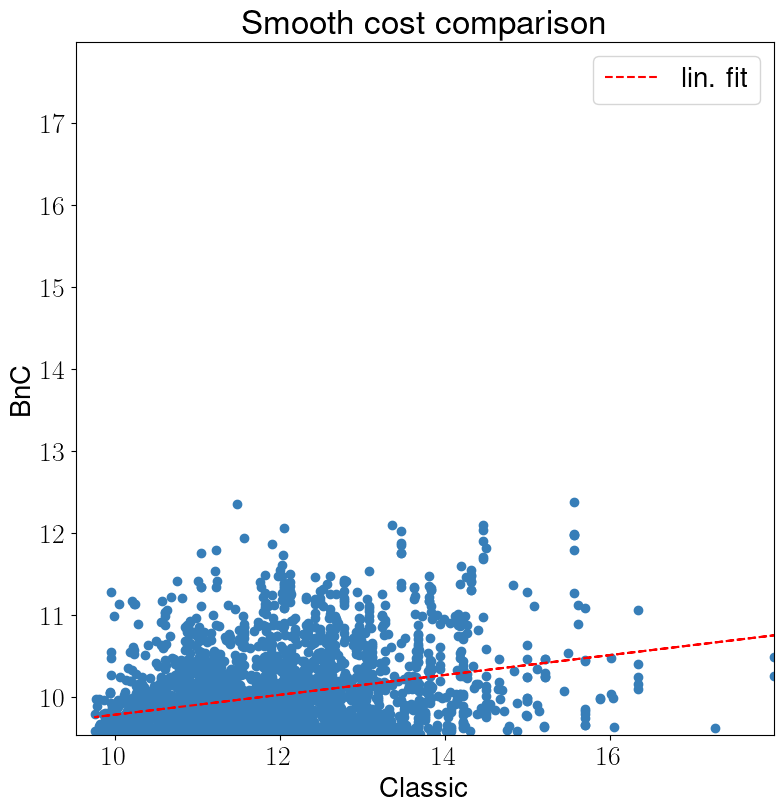

LinregressResult(slope=0.12115166796412108, intercept=8.573482884238256, rvalue=0.3020160811104793, pvalue=2.2560550493492078e-65, stderr=0.006925505844081074, intercept_stderr=0.0824849905082115)


In [13]:
x = cmp_table['smooth_cost_k.classic'].values
y = cmp_table['smooth_cost_k.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')
print(lin_model)

In [14]:
print(lin_model)

LinregressResult(slope=0.12115166796412108, intercept=8.573482884238256, rvalue=0.3020160811104793, pvalue=2.2560550493492078e-65, stderr=0.006925505844081074, intercept_stderr=0.0824849905082115)


## Plan Length

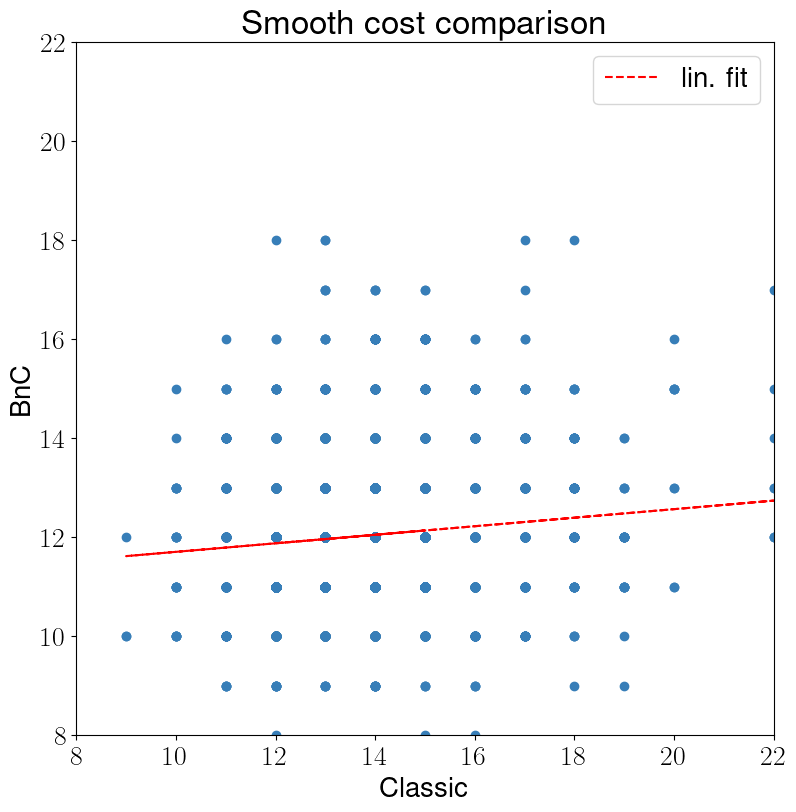

In [15]:
x = cmp_table['plan_length.classic'].values
y = cmp_table['plan_length.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')

In [16]:
print(lin_model)

LinregressResult(slope=0.08625432789325763, intercept=10.847566176384085, rvalue=0.10584754953996606, pvalue=4.61047527688125e-09, stderr=0.014674887837978188, intercept_stderr=0.2051417439288524)


### Graph size

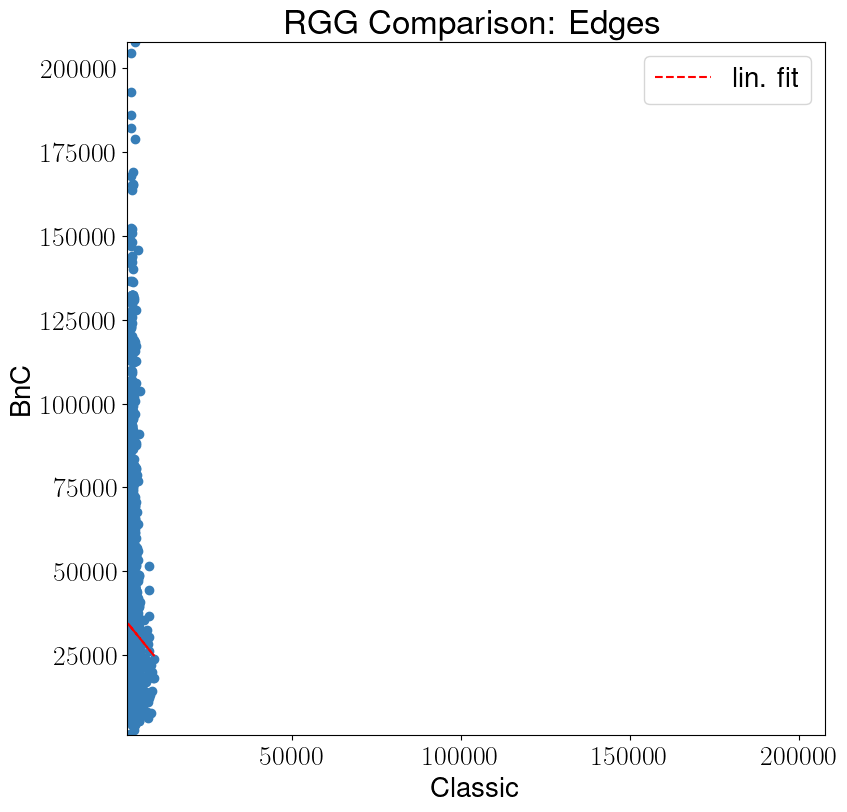

In [17]:
x = cmp_table['rgg_E.classic'].values
y = cmp_table['rgg_E.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Edges', x_name='Classic', y_name='BnC')

In [18]:
print(lin_model)

LinregressResult(slope=-1.2415269801792181, intercept=36201.319252520196, rvalue=-0.03856019794661764, pvalue=0.033186072729346185, stderr=0.5826598341724895, intercept_stderr=1644.128388390751)


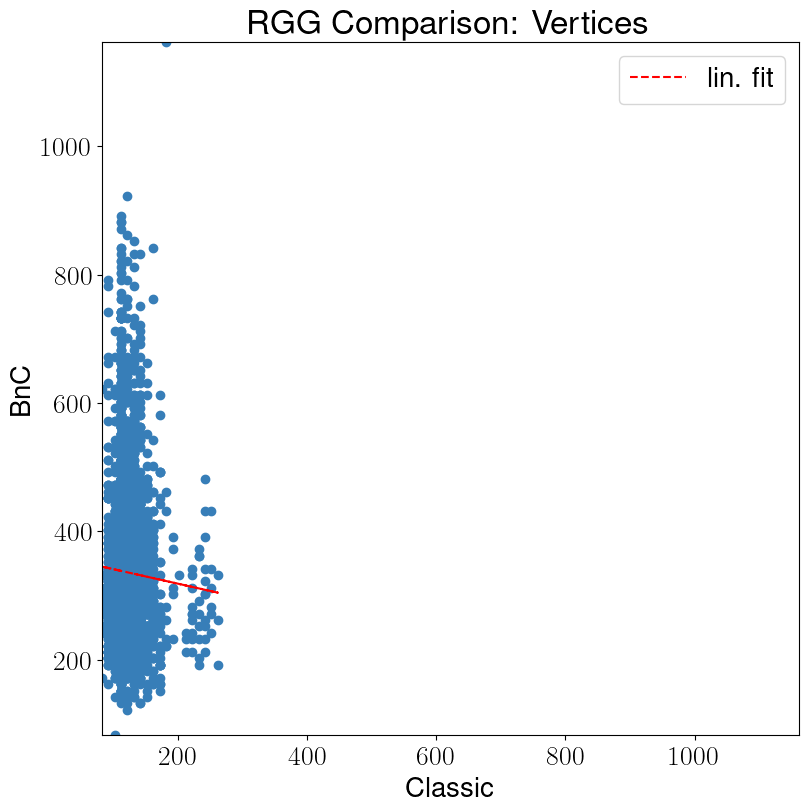

In [19]:
x = cmp_table['rgg_V.classic'].values
y = cmp_table['rgg_V.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Vertices', x_name='Classic', y_name='BnC')

In [20]:
print(lin_model)

LinregressResult(slope=-0.22645878663643706, intercept=363.90855848906585, rvalue=-0.03803338702163244, pvalue=0.03566678891431964, stderr=0.1077534345555683, intercept_stderr=13.395044505807128)


### Runtime

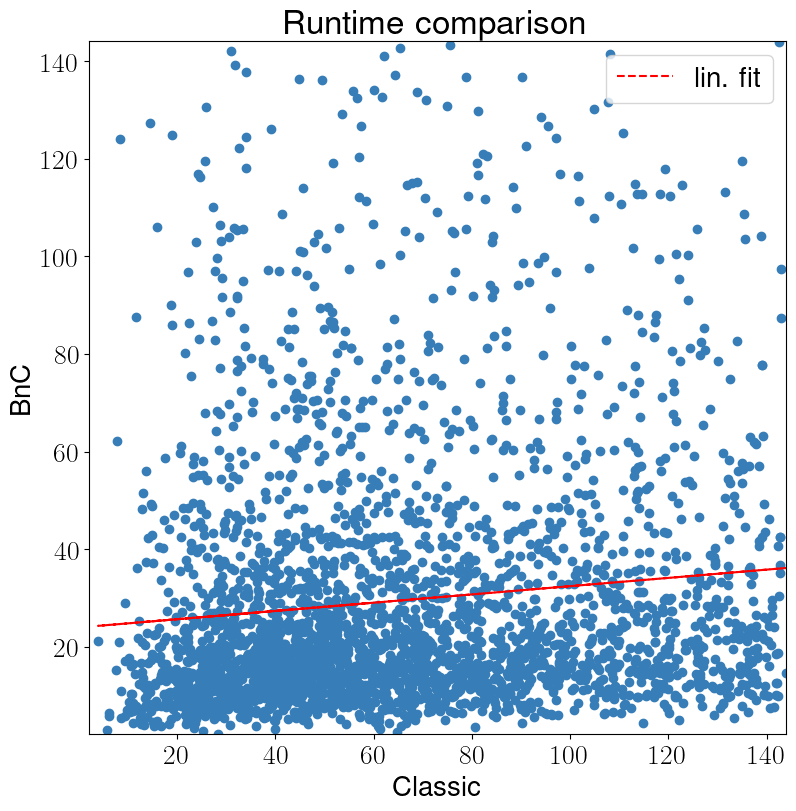

In [21]:
x = cmp_table['elapsed_time.classic'].values
y = cmp_table['elapsed_time.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Runtime comparison', x_name='Classic', y_name='BnC')

In [22]:
print(lin_model)

LinregressResult(slope=0.08465521159929272, intercept=23.981683531980448, rvalue=0.11198250927578601, pvalue=5.559714236621518e-10, stderr=0.0136045609474245, intercept_stderr=1.00553735029694)


# Coverage Comparison, $v_{max} \leq 2$

('cp_sat', 'multi_edge', 'bk', 2.0)
('pulse', 'multi_edge', 'bk', 2.0)


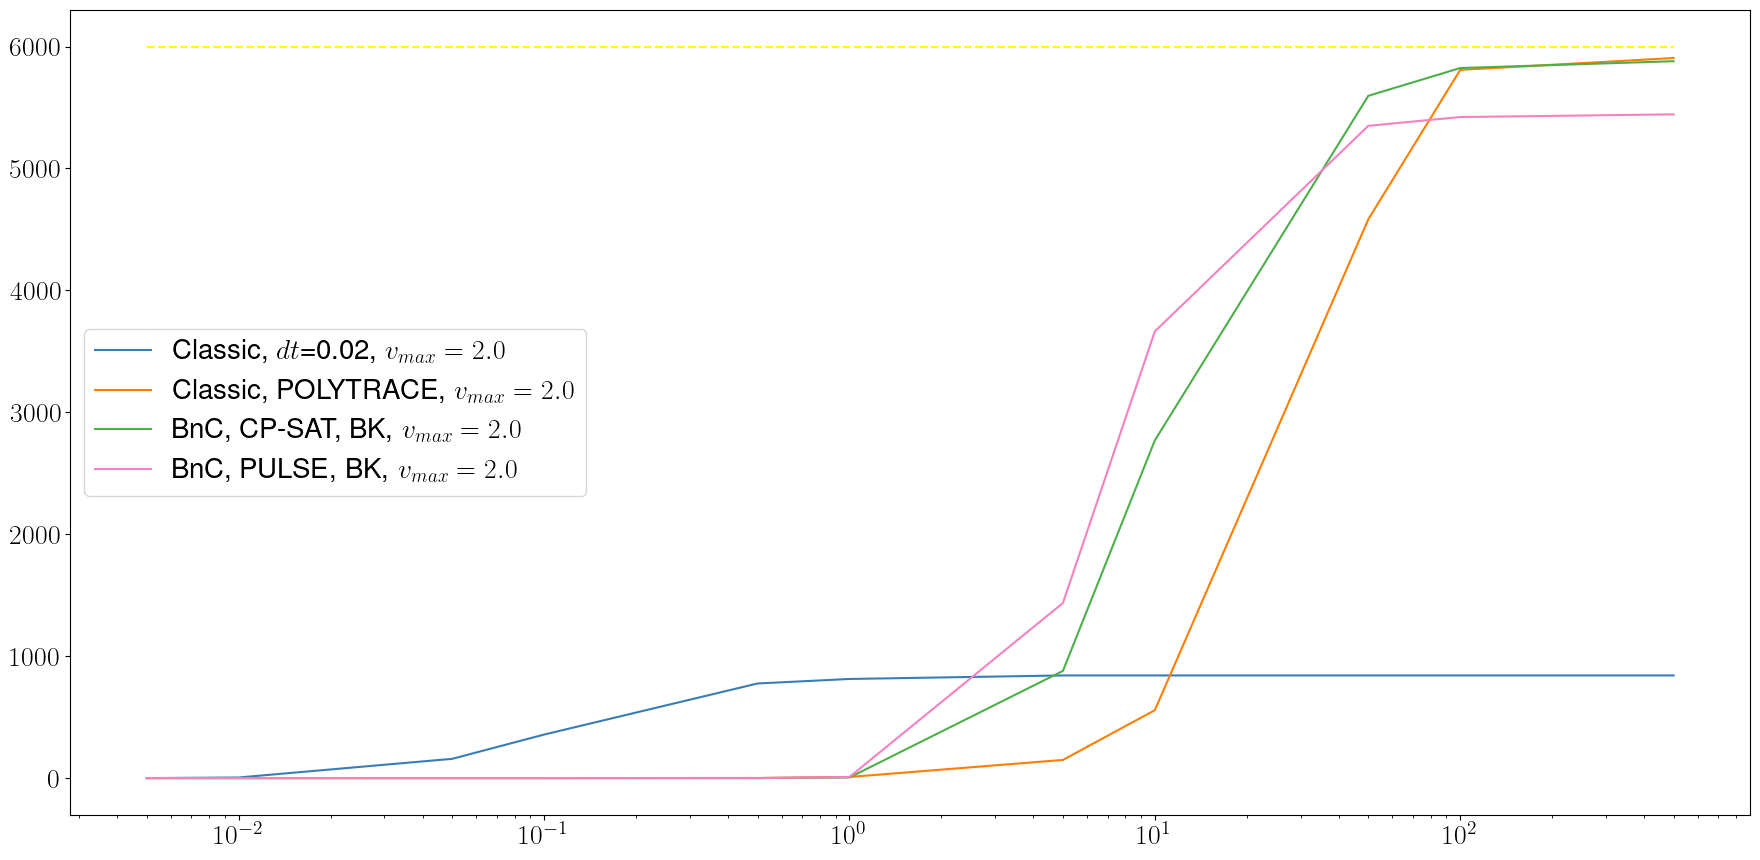

In [23]:
cmp_classic_configs = [('unknown', 0.02, 'bk', 2.0), ('polytrace', 0.1, 'bk', 2.0)]
bnc_configs = [('cp_sat', 'multi_edge', 'bk', 2.0), ('pulse', 'multi_edge', 'bk', 2.0)]

plt.figure(figsize=(18, 9))
plt.plot([default_time_breakpoints[0], default_time_breakpoints[-1]], [6000, 6000], color='yellow', linestyle='--')

for v in cmp_classic_configs:
    label = 'Classic'
    if v[0] == 'polytrace':
        label += ', POLYTRACE'
    else:
        label += ', $dt$={}'.format(v[1])
    label += ', ${} = {}$'.format('v_{max}', v[-1])
    plt.plot(default_time_breakpoints, classic_coverage[v], label=label)

for bnc_config in bnc_configs:
    print(bnc_config)
    label = 'BnC'
    if bnc_config[0] == 'cp_sat':
        label += ', CP-SAT'
    elif bnc_config[0] == 'pulse':
        label += ', PULSE'
    if bnc_config[2] == 'bk':
        label += ', BK'
    elif bnc_config[2] == 'gammell':
        label += ', Gammell'
    label += ', ${} = {}$'.format('v_{max}', bnc_config[-1])
    plt.plot(default_time_breakpoints, bnc_coverage[bnc_config], label=label)

#plt.title('Coverage of Lazy PRM configurations')
#plt.xlabel('Elapsed Time (s)')
plt.xscale('log')
#plt.ylabel('Valid')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
## Detailed comparison, $v_{max} \leq 1.5$

In [25]:
classic_best = classic_tables[('polytrace', 0.1, 'bk', 2.0)]
bnc_best = bnc_tables[('pulse', 'multi_edge', 'bk', 2.0)]
cmp_table = pd.merge(classic_best, bnc_best, on=('instance', 'seed', 'sequence'), suffixes=('.classic', '.bnc'))
cmp_table.head()

,domain.classic,instance,seed,sequence,max_speed.classic,no_good_type.classic,solver.classic,direction.classic,check_type.classic,num_no_goods.classic,rgg_V.classic,rgg_E.classic,rgg_expansions.classic,rgg_dispersion.classic,elapsed_time.classic,plan_time.classic,verif_time.classic,iterations.classic,valid.classic,exact_verification_time.classic,step_size.classic,holonomic_cost_0.classic,holonomic_cost_k.classic,smooth_cost_0.classic,smooth_cost_k.classic,plan_length.classic,domain.bnc,max_speed.bnc,no_good_type.bnc,solver.bnc,direction.bnc,check_type.bnc,num_no_goods.bnc,rgg_V.bnc,rgg_E.bnc,rgg_expansions.bnc,rgg_dispersion.bnc,elapsed_time.bnc,plan_time.bnc,verif_time.bnc,iterations.bnc,valid.bnc,exact_verification_time.bnc,step_size.bnc,holonomic_cost_0.bnc,holonomic_cost_k.bnc,smooth_cost_0.bnc,smooth_cost_k.bnc,plan_length.bnc
0,BARN,instance_123,353,halton,2.0,single_edge,a_star,bk,polytrace,118,62,853,5,6.332786,58.358695,0.078632,57.925836,123,True,0.0,0.1,13.407025,13.392447,13.625550,13.424311,13,BARN,2.0,multi_edge,pulse,bk,polytrace,4,62,938,5,2.424492,2.781696,0.041223,2.536826,5,True,None,None,13.407025,9.973024,13.625550,9.922101,8
1,BARN,instance_257,139,halton,2.0,single_edge,a_star,bk,polytrace,99,52,675,4,8.131302,69.695652,0.090780,69.345571,103,True,0.0,0.1,12.285628,14.279966,12.529492,14.743778,14,BARN,2.0,multi_edge,pulse,bk,polytrace,9,112,3272,10,4.161220,4.932525,0.251778,4.409055,10,True,None,None,12.285628,10.204660,12.529492,10.213150,9
2,BARN,instance_026,353,halton,2.0,single_edge,a_star,bk,polytrace,88,62,967,5,5.615280,28.732422,0.043248,28.437965,93,True,0.0,0.1,10.840793,10.950272,11.906073,11.031845,9,BARN,2.0,multi_edge,pulse,bk,polytrace,36,382,41836,37,3.957535,17.413193,1.325215,11.621640,37,True,None,None,10.840793,9.736373,11.906073,9.653858,13
3,BARN,instance_190,181,halton,2.0,single_edge,a_star,bk,polytrace,73,62,877,5,5.150895,34.256970,0.043085,33.975091,78,True,0.0,0.1,13.599324,10.873949,13.859634,11.092636,11,BARN,2.0,multi_edge,pulse,bk,polytrace,7,92,2213,8,2.309331,3.617328,0.012751,3.428957,8,True,None,None,13.599324,10.153791,13.859634,10.113661,8
4,BARN,instance_076,353,halton,2.0,single_edge,a_star,bk,polytrace,42,62,960,5,9.718387,18.353389,0.029675,18.160028,47,True,0.0,0.1,10.743326,10.203843,10.930761,10.206526,9,BARN,2.0,multi_edge,pulse,bk,polytrace,10,122,4353,11,4.668233,7.081192,0.059000,6.572810,11,True,None,None,10.743326,9.858913,10.930761,9.829749,8


## Plan costs

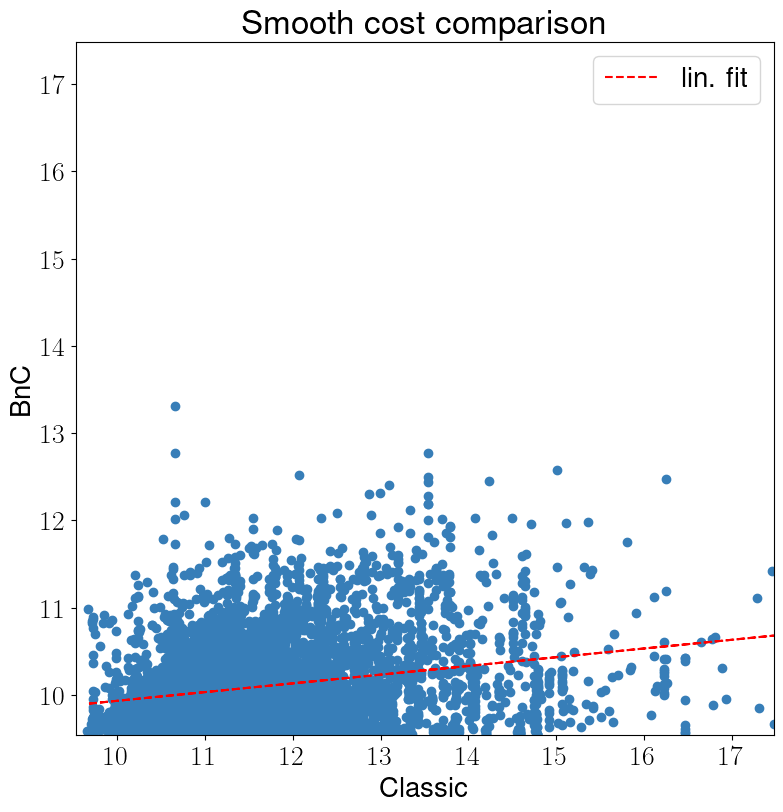

LinregressResult(slope=0.0999262737308507, intercept=8.932479939914357, rvalue=0.23124664331605688, pvalue=6.510207718601215e-66, stderr=0.005747153835984612, intercept_stderr=0.06791757046145536)


In [26]:
x = cmp_table['smooth_cost_k.classic'].values
y = cmp_table['smooth_cost_k.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')
print(lin_model)

## Plan Length

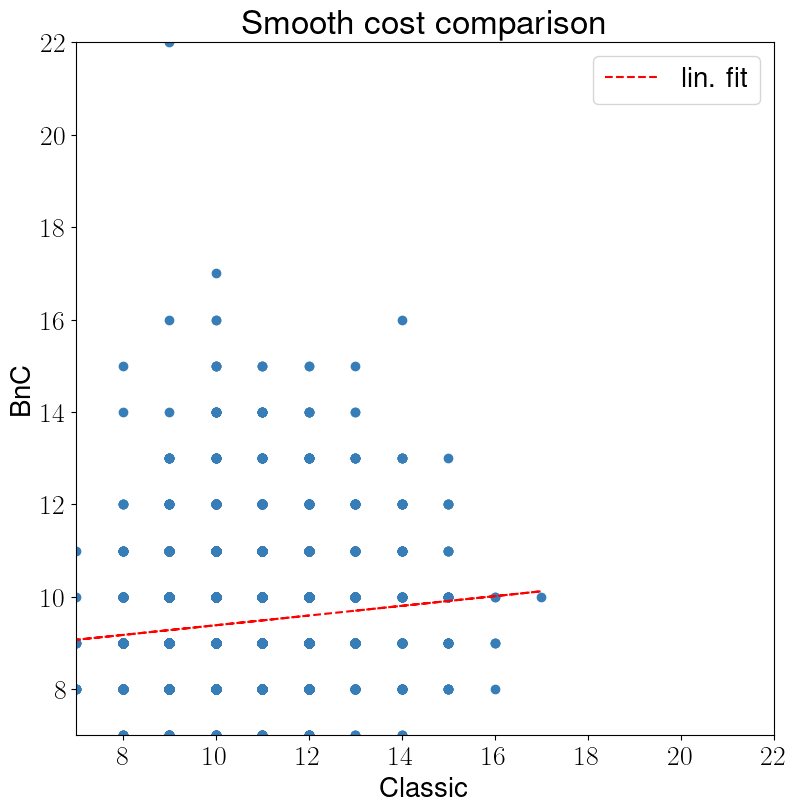

In [27]:
x = cmp_table['plan_length.classic'].values
y = cmp_table['plan_length.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Smooth cost comparison', x_name='Classic', y_name='BnC')

## Graph Size

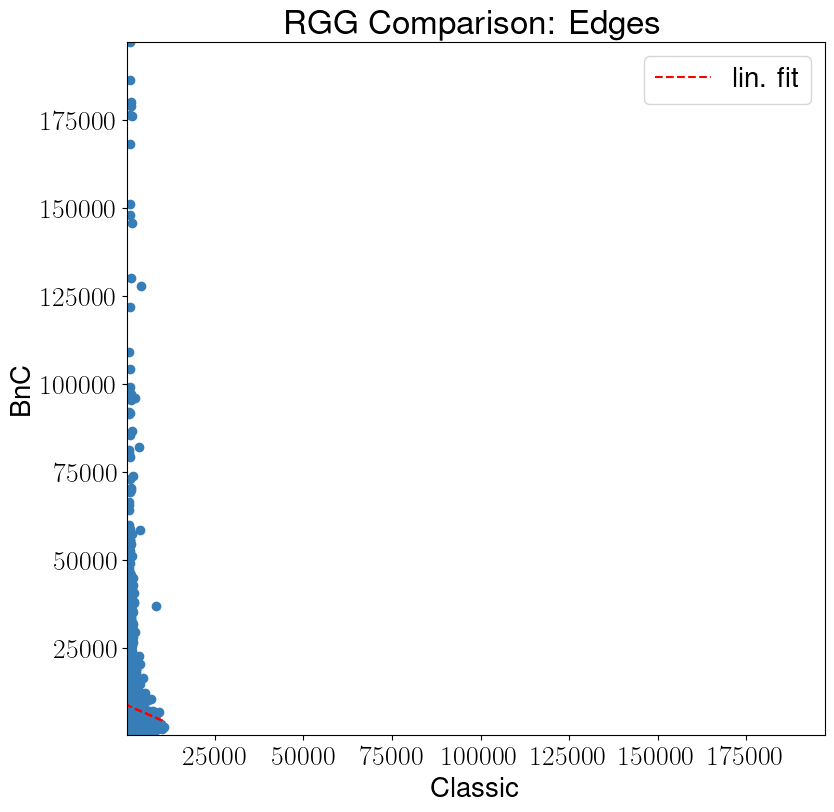

LinregressResult(slope=-0.4395768513334969, intercept=8882.724571705565, rvalue=-0.028639559656933225, pvalue=0.03614159158073699, stderr=0.20973592201160998, intercept_stderr=289.31691719745805)


In [28]:
x = cmp_table['rgg_E.classic'].values
y = cmp_table['rgg_E.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Edges', x_name='Classic', y_name='BnC')
print(lin_model)

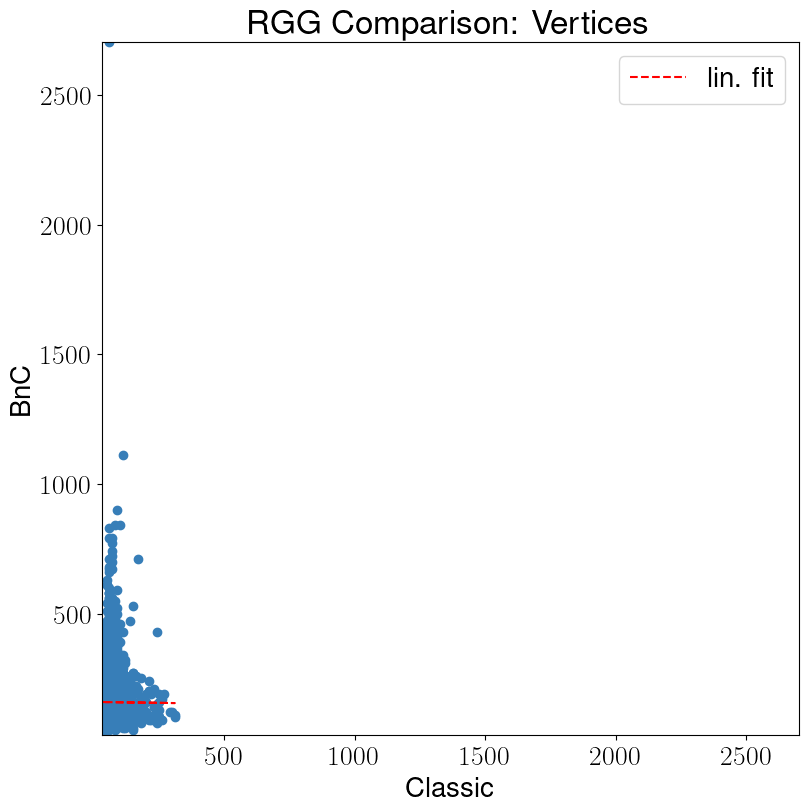

LinregressResult(slope=-0.014081207109637204, intercept=161.3548662621465, rvalue=-0.004186912184225297, pvalue=0.7594052627745436, stderr=0.0459753190691982, intercept_stderr=3.4063947765815907)


In [29]:
x = cmp_table['rgg_V.classic'].values
y = cmp_table['rgg_V.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='RGG Comparison: Vertices', x_name='Classic', y_name='BnC')
print(lin_model)

## Runtime

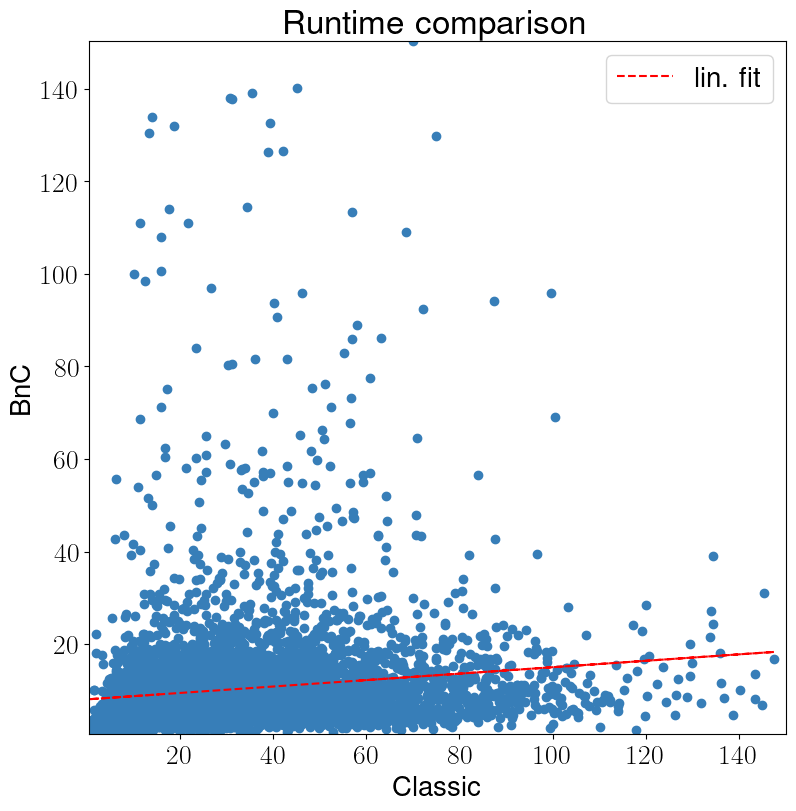

In [30]:
x = cmp_table['elapsed_time.classic'].values
y = cmp_table['elapsed_time.bnc'].values

lin_model = compare_with_scatter_chart(x, y, title='Runtime comparison', x_name='Classic', y_name='BnC')